# HMS Capstone - Machine Learning - Linear & Logistic Regression
## By: AJ Goldstein (https://github.com/ajva1996)

### <span style="color:red">Modeling Task: </span>
### Quantify the relationship between psychological inflexibility (i.e. AAQ) and mental health outcomes (i.e. depression, anxiety, well-being) while controlling for key demographic info (i.e. race, gender, field of study)

### <span style="color:red">Why Linear & Logistic Regression?</span>
- WHY 1: <b>incredibly high interpretability</b>--> easily understood by non-technical stakeholders
- WHY 2: <b>assumes continous, linear relationship</b>--> observed in the EDA phase
- WHY 3: <b>feature importances were pre-determined</b>--> using results from random forests here

### <span style="color:red">Analysis Steps:</span>
- 1) Preliminary linear regression fits
    - AAQ, depression, anxiety, wellbeing
- 2) Simple OLS linear regression
    - X vs. Y for all 3 combinations
- 3) OLS regression with interaction terms
    - controlling for categorical demographics

In [25]:
from __future__ import division
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set_context("talk")

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## STEP #0: Carry forward data from previous notebook

In [26]:
# cleaned dataset
%store -r HMS

# separated modules
%store -r HMS_ids
%store -r HMS_demo
%store -r HMS_mhstatus
%store -r HMS_mhhelp
%store -r HMS_aaq

# tidy variable groups
%store -r tidy_race
%store -r tidy_religion
%store -r tidy_degreeType
%store -r tidy_fieldOfStudy
%store -r tidy_activity
%store -r tidy_age
%store -r tidy_gender
%store -r tidy_relig

## STEP #1: Preliminary Regression Fits

### 1) psychological inflexibility vs. depression

In [27]:
# create new dataframe with only independent & dependent variables
HMS_vars = pd.concat([HMS_aaq.AAQ_total, HMS.deprawsc, HMS.anx_score, HMS.flourish], axis=1)

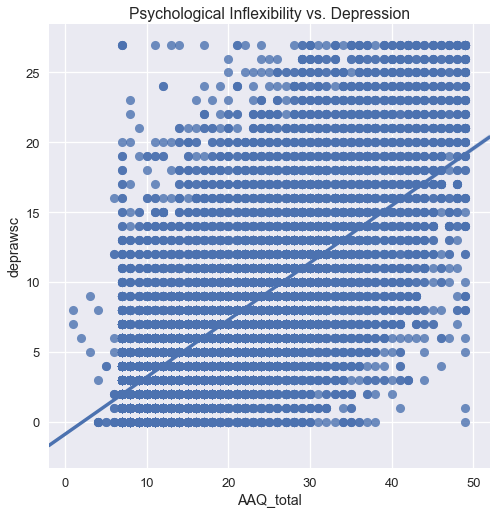

In [67]:
sns.lmplot(x='AAQ_total', y='deprawsc', data=HMS_vars, size=7);
plt.title('Psychological Inflexibility vs. Depression');

### <span style="color:red"> There appears to be a strong, positive linear relationship.</span>
- There are quite a few outliers here, but as a whole, the trend is very strong, which is not surprising
- Intuitively, this could be interpreted as: <span style="color:red">"the more psychologically inflexible a college student is, the worse they will (on average) suffer from depression."</span>

### 2 psychological inflexibility vs. anxiety

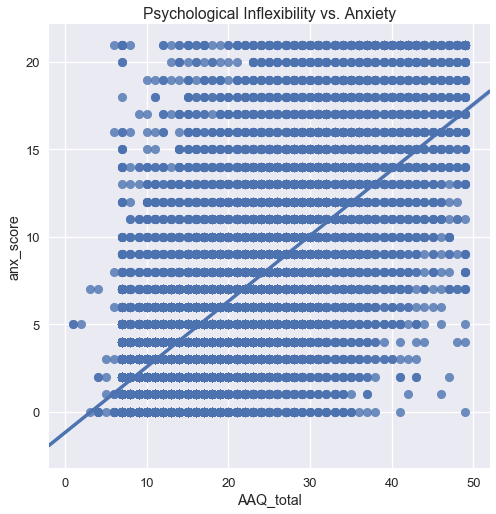

In [29]:
sns.lmplot(x='AAQ_total', y='anx_score', data=HMS_vars, size=7);
plt.title('Psychological Inflexibility vs. Anxiety');

### <span style="color:red"> There appears to be a strong, positive linear relationship.</span>
- There are quite a few outliers here, but as a whole, the trend is very strong, which is not surprising
- Intuitively, this could be interpreted as: <span style="color:red">"the more psychologically inflexible a college student is, the worse they will (on average) suffer from anxiety."</span>

### 3) psychological inflexibility vs. psychological well-being

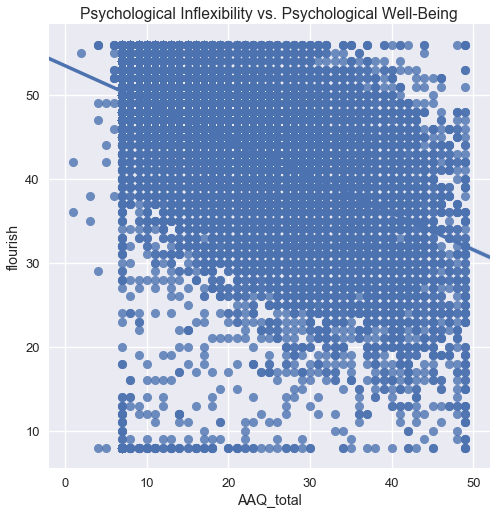

In [30]:
sns.lmplot(x='AAQ_total', y='flourish', data=HMS_vars, size=7);
plt.title('Psychological Inflexibility vs. Psychological Well-Being');

### <span style="color:red"> There appears to be a moderate, negative linear relationship.</span>
- There are many outliers here, but as a whole, the trend is moderate in strength
- Intuitively, this could be interpreted as: <span style="color:red">"the more psychologically inflexible a college student is, the worse their psychological well-being will become."</span>

## STEP #2: Simple OLS Regression

In [31]:
# create RMSE function as absolute measure of fit
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

### 1) psychological inflexibility vs. depression

In [32]:
# create training and test set
data = HMS_vars[['deprawsc', 'AAQ_total']].dropna(axis=0, how='any') # only use students with both scores
trainData, testData = train_test_split(data, test_size=0.33)
print('sample size:',len(data))
print('train set:',len(trainData))
print('test:',len(testData))

('sample size:', 23325)
('train set:', 15627)
('test:', 7698)


In [33]:
# perform ordinary least squares (OLS)
model = smf.ols('deprawsc ~ AAQ_total', data=trainData).fit()

# results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               deprawsc   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                 1.291e+04
Date:                Fri, 08 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:39:56   Log-Likelihood:                -45353.
No. Observations:               15627   AIC:                         9.071e+04
Df Residuals:                   15625   BIC:                         9.073e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8581      0.086    -10.013      0.0

In [34]:
# make predictions on test data
predictions = model.predict(testData.AAQ_total)

# calculate root-mean-square-error (RMSE)
print('model RMSE:', rmse(predictions, testData.deprawsc))

('model RMSE:', 4.3691079671921766)


In [71]:
df = pd.concat([pd.Series(testData.AAQ_total), pd.Series(predictions)], axis=1)
df.columns = ['AAQ', 'deprawsc']
df.head()
df.groupby(['AAQ'])['deprawsc'].mean().head()

AAQ
1.0   -0.492356
3.0    0.360615
4.0    0.741911
5.0    1.258150
6.0    1.515523
Name: deprawsc, dtype: float64

In [69]:
df2 = pd.concat([pd.Series(testData.AAQ_total), pd.Series(testData.deprawsc)], axis=1)
df2.columns = ['AAQ', 'deprawsc']
df2.head()
df2.groupby(['AAQ'])['deprawsc'].mean();

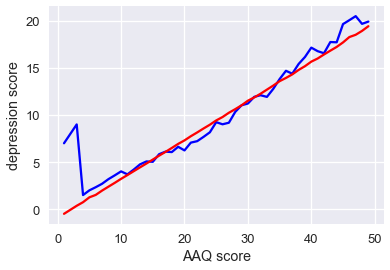

In [70]:
plt.plot(df2.groupby(['AAQ'])['deprawsc'].mean(), color='blue')
plt.plot(df.groupby(['AAQ'])['deprawsc'].mean(), color='red')
plt.xlabel('AAQ score')
plt.ylabel('depression score');

### <span style="color:red">Interpretation:</span>
- <b><span style="color:red">A student's AAQ score is a statistically significant predictor of their depression score (p-value ~= 0) </span></b>
- <b><span style="color:red">For every 1 unit increase in AAQ, we can expect a 0.41 increase in deprawsc.</span></b>

### 2) psychological inflexibility vs. anxiety

In [36]:
# create training and test set
data = HMS_vars[['anx_score', 'AAQ_total']].dropna(axis=0, how='any') # only use students with both scores
trainData, testData = train_test_split(data, test_size=0.33)
print('sample size:',len(data))
print('train set:',len(trainData))
print('test:',len(testData))

('sample size:', 23404)
('train set:', 15680)
('test:', 7724)


In [37]:
# perform ordinary least squares (OLS)
model = smf.ols('anx_score~ AAQ_total', data=trainData).fit()

# results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              anx_score   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                 1.217e+04
Date:                Fri, 08 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:39:56   Log-Likelihood:                -44680.
No. Observations:               15680   AIC:                         8.936e+04
Df Residuals:                   15678   BIC:                         8.938e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1813      0.081    -14.552      0.0

In [38]:
# make predictions on test data
predictions = model.predict(testData.AAQ_total)

# calculate root-mean-square-error (RMSE)
print('model RMSE:', rmse(predictions, testData.anx_score))

('model RMSE:', 4.1110852335182662)


### <span style="color:red">Interpretation:</span>
- <b><span style="color:red">A student's AAQ score is a statistically significant predictor of their anxiety score (p-value ~= 0).</span></b>
- <b><span style="color:red">For every 1 unit increase in AAQ, we can expect a 0.375 increase in anx_score.</span></b>

### 3) psychological inflexibility vs. psychological well-being

In [39]:
# create training and test set
data = HMS_vars[['flourish', 'AAQ_total']].dropna(axis=0, how='any') # only use students with both scores
trainData, testData = train_test_split(data, test_size=0.33)
print('sample size:',len(data))
print('train set:',len(trainData))
print('test:',len(testData))

('sample size:', 24814)
('train set:', 16625)
('test:', 8189)


In [40]:
# perform ordinary least squares (OLS)
model = smf.ols('flourish ~ AAQ_total', data=trainData).fit()

# results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               flourish   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     5575.
Date:                Fri, 08 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:39:56   Log-Likelihood:                -56958.
No. Observations:               16625   AIC:                         1.139e+05
Df Residuals:                   16623   BIC:                         1.139e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.5438      0.140    381.730      0.0

In [41]:
# make predictions on test data
predictions = model.predict(testData.AAQ_total)

# calculate root-mean-square-error (RMSE)
print('model RMSE:', rmse(predictions, testData.flourish))

('model RMSE:', 7.504228470233171)


### <span style="color:red">Interpretation:</span>
- <b><span style="color:red">A student's AAQ score is a statistically significant predictor of their psychological well-being score (p-value ~= 0) </span></b>
- <b><span style="color:red">For every 1 unit increase in AAQ, we can expect a -0.442 decrease in flourish.</span></b>

## STEP #3: OLS Regression with Interaction Terms

### 1) RACE as an interaction

In [42]:
tidy_race.head()

,responseid,flourish,deprawsc,anx_score,AAQ_total,race
16,R_1gvZNcJatOt9lEi,49.0,NaN,NaN,NaN,race_black
34,R_1JOq1q31fzyKpXu,45.0,NaN,NaN,NaN,race_black
40,R_2xwWffFvNbw4BOp,NaN,NaN,NaN,NaN,race_black
49,R_27kz8oG4lLC41TA,43.0,NaN,NaN,NaN,race_black
73,R_1NC8EpaqcDX0CLm,52.0,NaN,NaN,NaN,race_black


In [43]:
# create training and test set
data = tidy_race[['deprawsc', 'AAQ_total', 'race']].dropna(axis=0, how='any') # only use students with both scores
trainData, testData = train_test_split(data, test_size=0.33)
print('sample size:',len(data))
print('train set:',len(trainData))
print('test:',len(testData))

('sample size:', 25814)
('train set:', 17295)
('test:', 8519)


In [44]:
# perform ordinary least squares (OLS)
model = smf.ols('deprawsc ~ AAQ_total + AAQ_total:C(race)', data=trainData).fit()

# results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               deprawsc   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     1844.
Date:                Fri, 08 Dec 2017   Prob (F-statistic):               0.00
Time:                        19:39:57   Log-Likelihood:                -50206.
No. Observations:               17295   AIC:                         1.004e+05
Df Residuals:                   17286   BIC:                         1.005e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [45]:
# make predictions on test data
predictions = model.predict(testData[['AAQ_total','race']])

# calculate root-mean-square-error (RMSE)
print('model RMSE:', rmse(predictions, testData.deprawsc))

('model RMSE:', 4.4348979012928611)
